# IRIS Dataset - Exploration on various Models  (D.Karthikeyan)


## Version check

In [2]:
import sys
print("Python version is {}".format(sys.version))
import pandas
print("Pandas version is {}".format(pandas.__version__))
import numpy
print("Numpy is {}".format(numpy.__version__))
import matplotlib
print("matplotlib version is {}".format(matplotlib.__version__))
import sklearn
print("sikitlearn version is {}".format(sklearn.__version__))

Python version is 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version is 0.23.0
Numpy is 1.14.3
matplotlib version is 2.2.2
sikitlearn version is 0.19.1


## Import IRIS Dataset

In [3]:
from sklearn import datasets

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
#Load Data
iris = datasets.load_iris()

In [6]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


## Explorative Data Analysis

In [7]:
X = iris.data

In [8]:
y = iris.target

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [13]:
Features_consolidated=[]
Features=iris.data
Features.shape

(150, 4)

In [14]:
for records in iris.data:
    Features_consolidated.append(records[0]+records[1]+records[2]+records[3])
    

In [15]:
targets=iris.target
targets.shape

(150,)

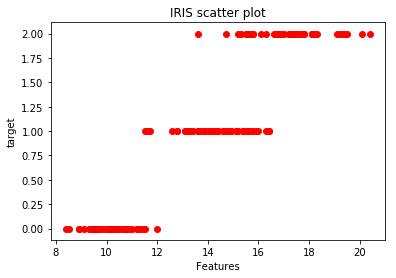

In [16]:
plt.scatter(Features_consolidated,targets,alpha=1.0,color='red')
plt.title('IRIS scatter plot')
plt.xlabel('Features')
plt.ylabel('target')
plt.show()

In [17]:
iris1=pandas.DataFrame(iris.data)

In [20]:
iris1.columns=iris.feature_names


In [21]:
iris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
type(iris1)

pandas.core.frame.DataFrame

In [23]:
iris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


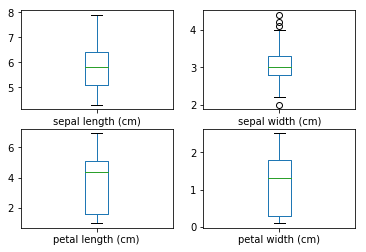

In [44]:
iris1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

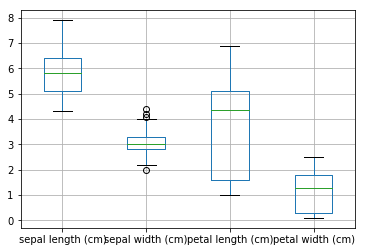

In [34]:
iris1.boxplot()

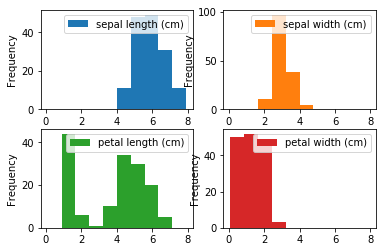

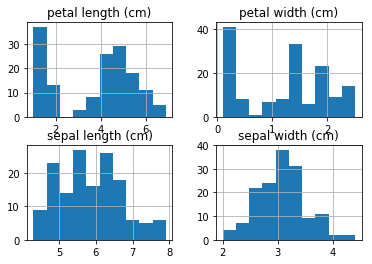

In [45]:
iris1.plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
iris1.hist()
plt.show()

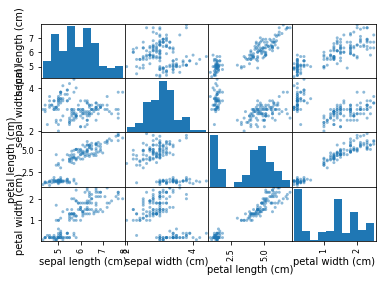

In [55]:
scatter_matrix(iris1)
plt.show()

In [96]:
#As the volume of features is not big, using all the features for the model training

# Exploration on Various Machine Learning Models

In [78]:
X = iris1
Y = iris.target

In [84]:
ValidationSize=0.20
seed=5
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, test_size=ValidationSize, random_state=seed)

In [86]:
#Model training and evaluation
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVN',SVC()))
models.append(('NB',GaussianNB()))

In [90]:
results=[]
names=[]
for model_name,model in models:
    k_fold=model_selection.KFold(n_splits=10, random_state=seed)
    crossvalidation_results=model_selection.cross_val_score(model,X_train,Y_train, cv=k_fold, scoring='accuracy')
    results.append(crossvalidation_results)
    names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, crossvalidation_results.mean(), crossvalidation_results.std())
    print(msg)
    

LR: 0.941667 (0.053359)
KNN: 0.983333 (0.033333)
SVN: 0.975000 (0.038188)
NB: 0.958333 (0.041667)


### KNN shows best training accuracy

# Validating the Models with test data

## KNeighborsClassifier

In [93]:
#Prediction score with KNN
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions=knn.predict(X_test)
print(accuracy_score(predictions,Y_test))
print(confusion_matrix(predictions,Y_test))
print(classification_report(predictions,Y_test))

0.9333333333333333
[[ 8  0  0]
 [ 0  9  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.82      1.00      0.90         9
          2       1.00      0.85      0.92        13

avg / total       0.95      0.93      0.93        30



## GaussianNB

In [95]:
#Prediction with Naives Bayes
NB=GaussianNB()
NB.fit(X_train,Y_train)
predictions=NB.predict(X_test)
print(accuracy_score(predictions,Y_test))
print(confusion_matrix(predictions,Y_test))
print(classification_report(predictions,Y_test))

0.9
[[ 8  0  0]
 [ 0 10  2]
 [ 0  1  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.91      0.83      0.87        12
          2       0.82      0.90      0.86        10

avg / total       0.90      0.90      0.90        30



## SVN

In [101]:
SVN = SVC()
SVN.fit(X_train,Y_train)
predictions = SVN.predict(X_test)
print(accuracy_score(predictions, Y_test))
print(confusion_matrix(predictions,Y_test))
print(classification_report(predictions,Y_test))

0.9666666666666667
[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.91      1.00      0.95        10
          2       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        30



## LogisticRegression()

In [102]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions=LR.predict(X_test)
print(accuracy_score(predictions, Y_test))
print(confusion_matrix(predictions,Y_test))
print(classification_report(predictions,Y_test))

0.9
[[ 8  0  0]
 [ 0  8  0]
 [ 0  3 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.73      1.00      0.84         8
          2       1.00      0.79      0.88        14

avg / total       0.93      0.90      0.90        30



# Conclusion:
    Out of the models explored here, SVN gives better Accuracy and Recall rate. By further tuning the parameters, the performance can be further improvised.